<a href="https://colab.research.google.com/github/IA-DAMA/ML_ClassificationModels/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cols = ["area", "perimeter", "compactness", "lenght", "width", "assymmetry", "groove", "class"]
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+") #by adding "sep="\s+"", so cols can be labeled and better read
#sep="\s+" (Space) > Here we are telling pandas to separate into spaces

In [9]:
df.head()

,area,perimeter,compactness,lenght,width,assymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


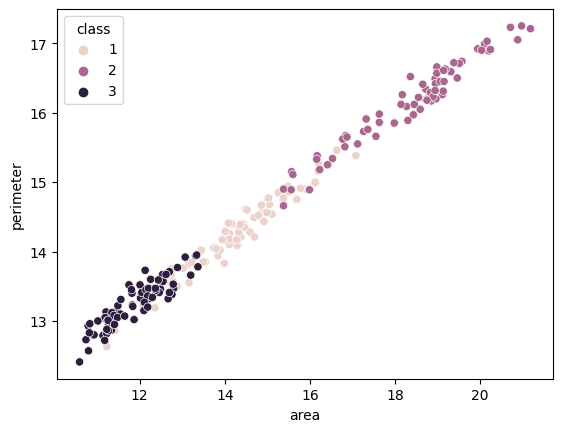

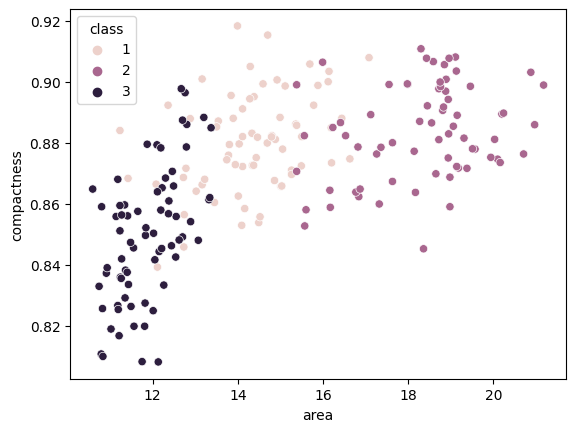

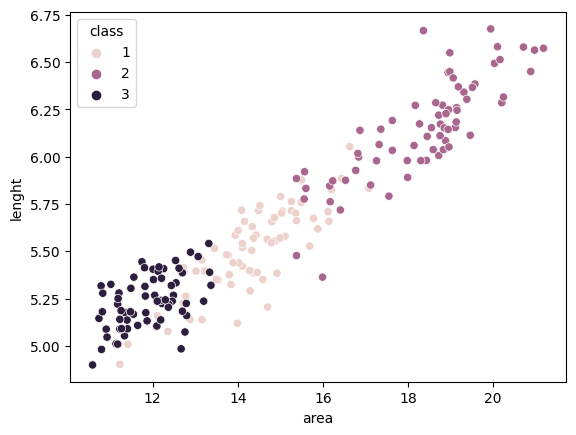

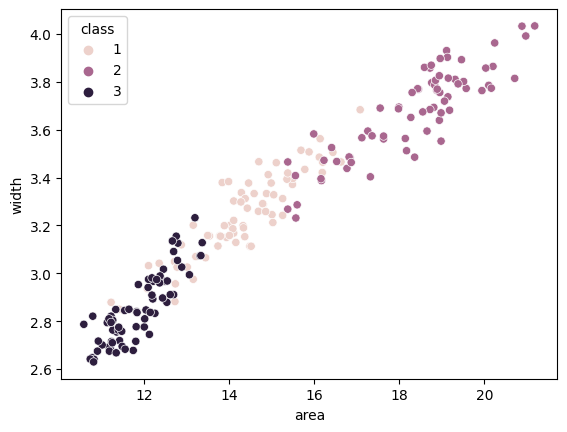

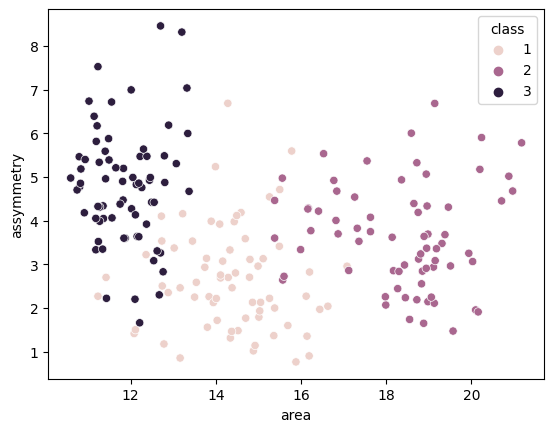

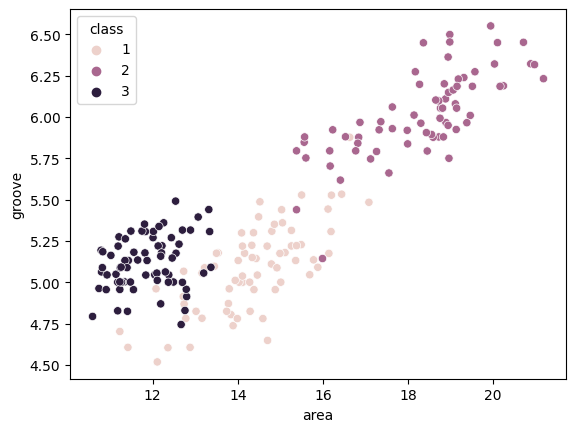

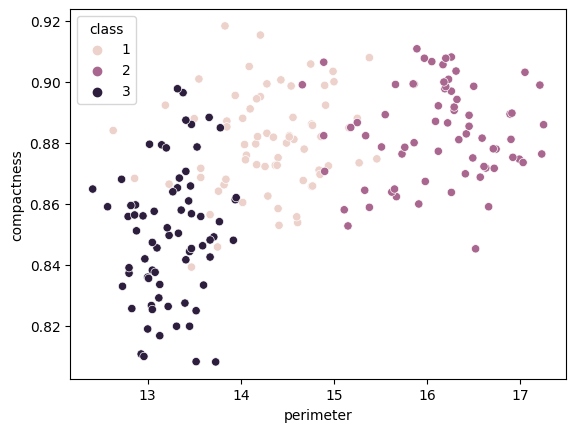

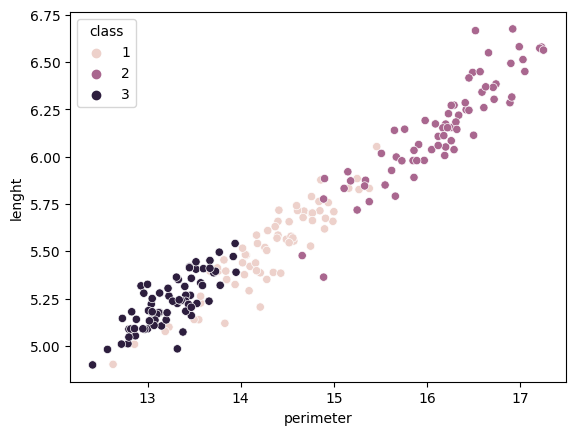

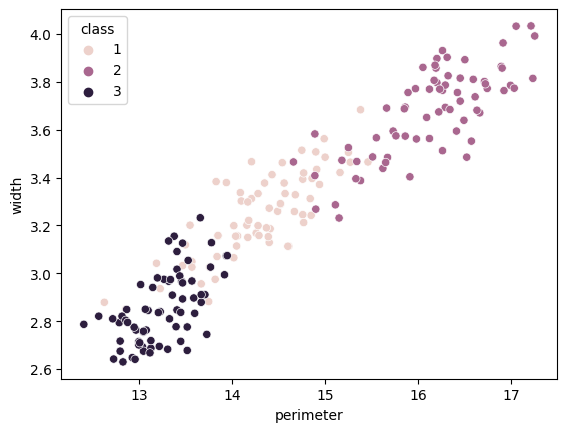

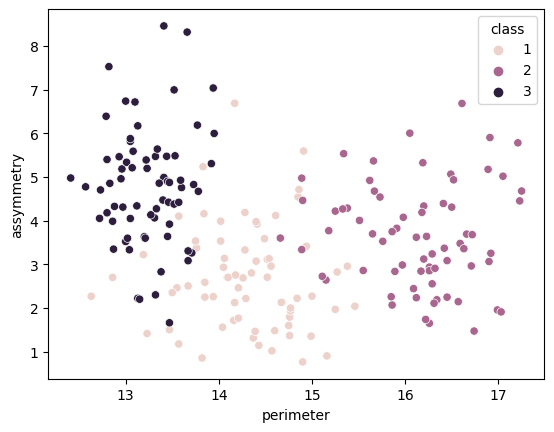

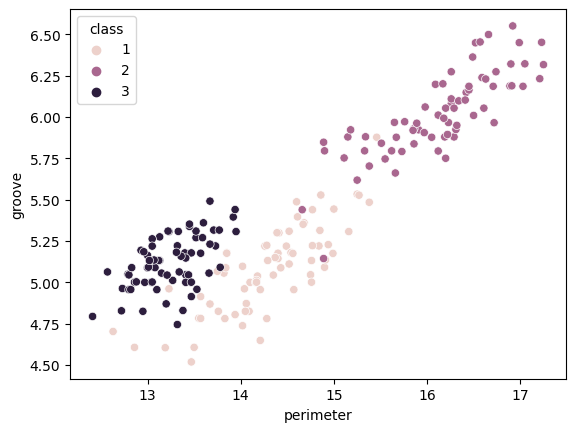

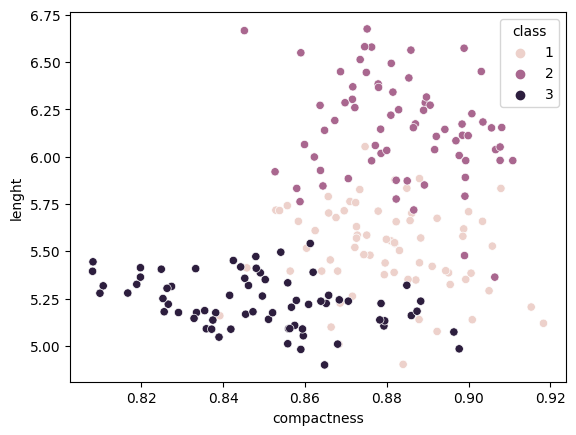

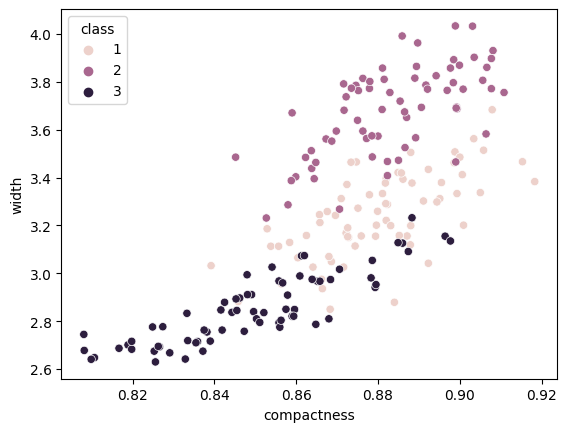

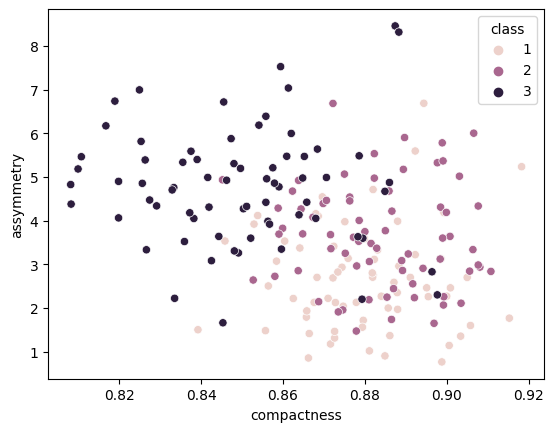

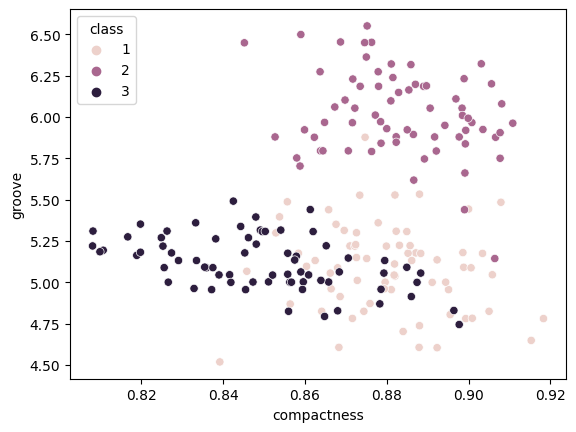

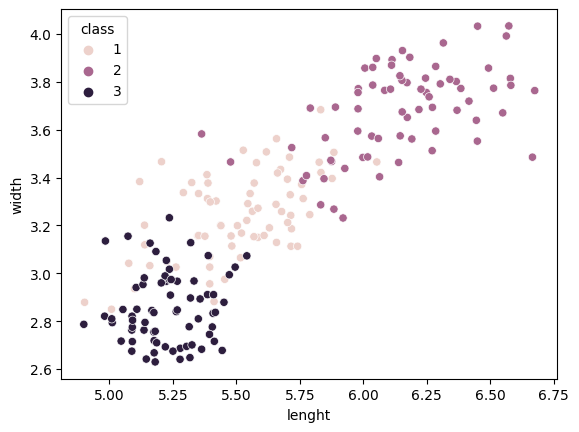

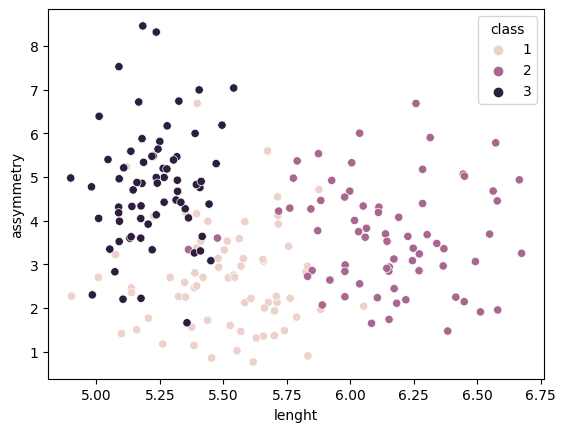

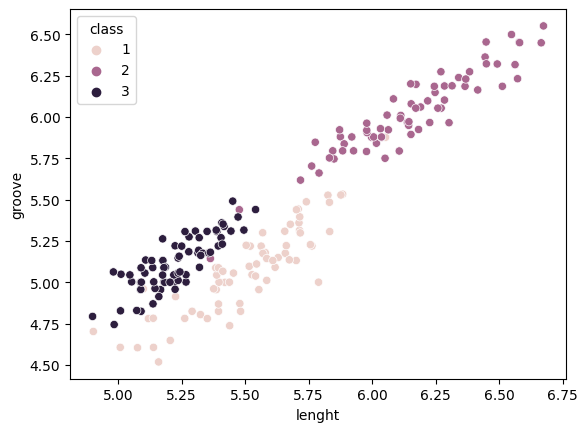

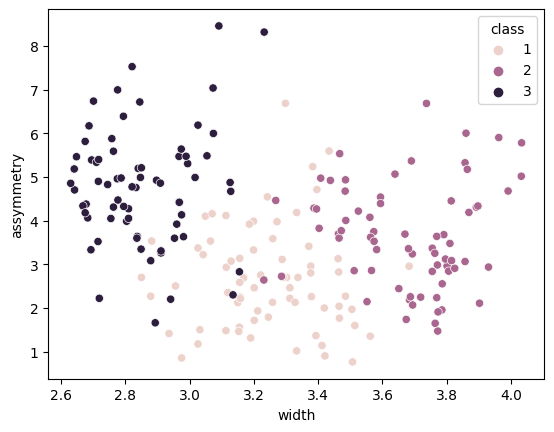

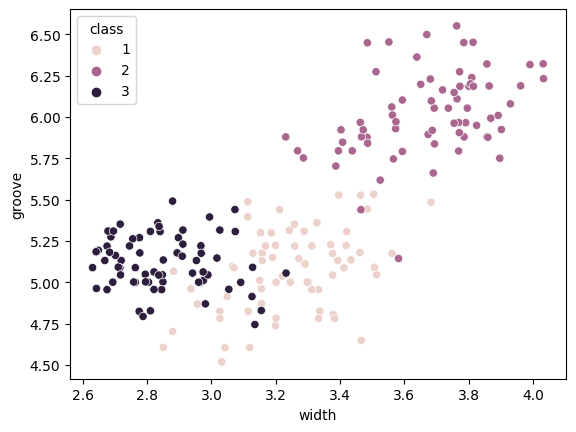

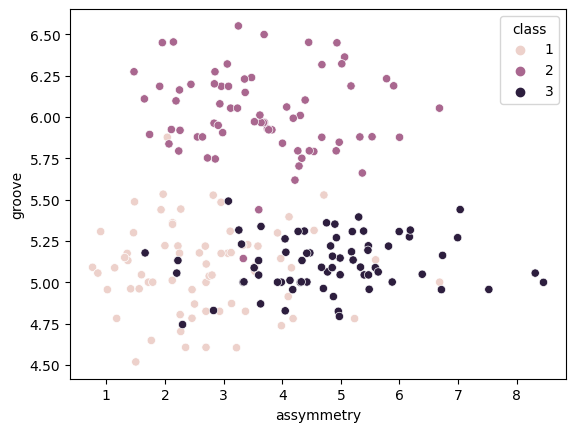

In [14]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class') #Try to run this cell once without "plt.show()"
    plt.show()

#Clustering

In [15]:
from sklearn.cluster import KMeans

*x and y here are just chosen features for the following*

In [36]:
x = "compactness"
y = "assymmetry"
X = df[[x,y]].values

In [37]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
clusters = kmeans.labels_

In [22]:
#clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2], dtype=int32)

In [23]:
#df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

***To visualize it we create a dataframe***

In [24]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x,y, "class"])

*K Mean classes*

[]

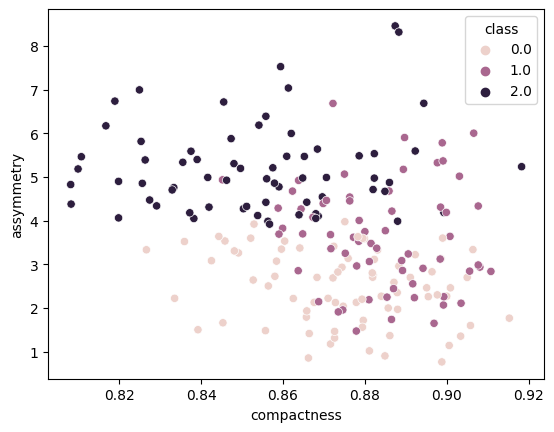

In [39]:
# K Means Classes - data=cluster_df now, hue='class', yada, yada

sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

*Original classes*

[]

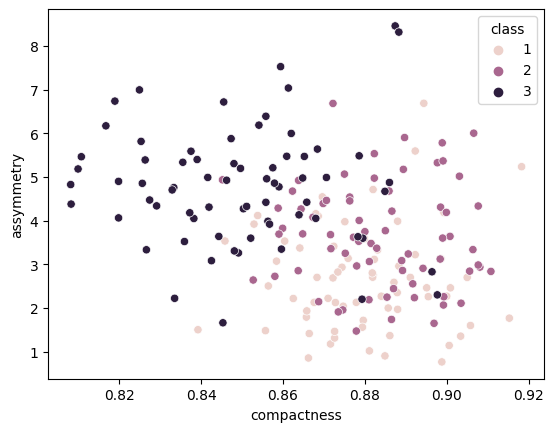

In [40]:
# Original Classes

sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

#High dimensions

In [41]:
X = df[cols[:-1]].values

In [42]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

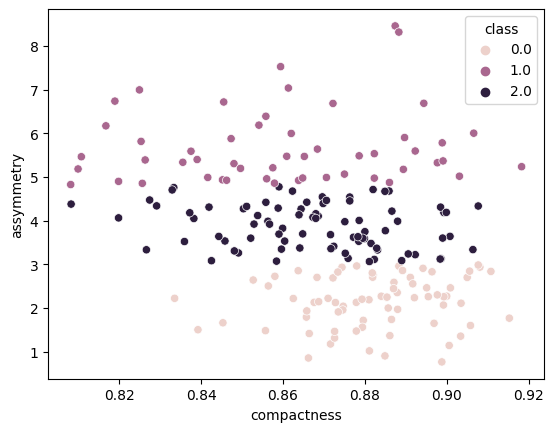

In [43]:
# K Means Classes

sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

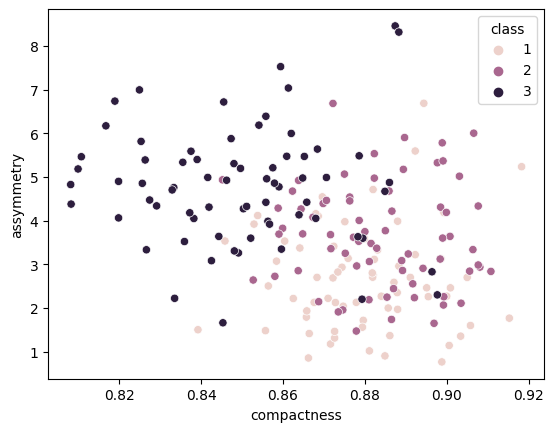

In [44]:
# Original Classes

sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

#PCA

In [45]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [48]:
X.shape

(210, 7)

In [49]:
transformed_x.shape

(210, 2)

In [50]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

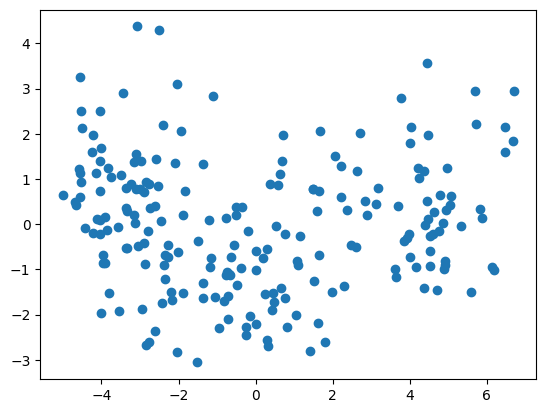

In [56]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

**DataFrame for K Means**

In [59]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

**Dataframe for the truth**

In [61]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

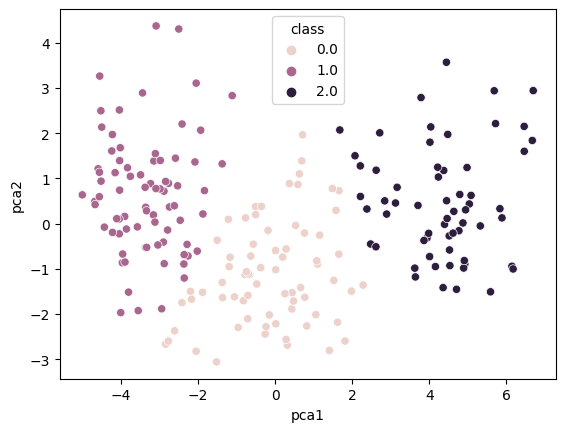

In [62]:
# K Means Classes

sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

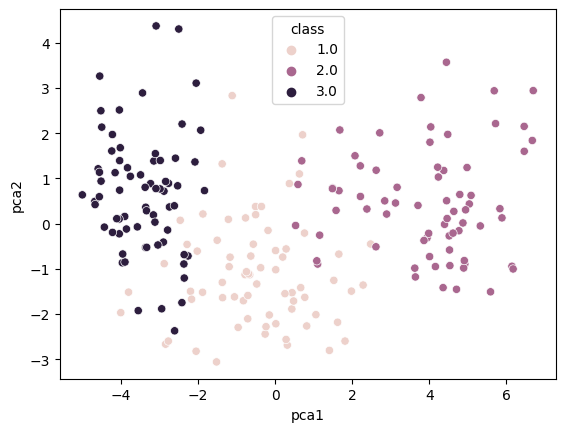

In [63]:
# Truth Classes

sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()

*In this High Dimension; Data is more separable than run on the cell high above given PCA and settings those results by changing paramters like dataframes*